In [43]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
#Defines Global Variables data entries
TOTAL_DATA = 150

# Splits data into training(80%) and testing(20%)
TRAINING_DATA = int(TOTAL_DATA*0.8) 
TESTING_DATA = int(TOTAL_DATA*0.2)

# Number of input features
FEATURE_NUMBER = 4

# Number of classes and respective indexing
CLASS_NUMBER = 3
CLASSNAMES = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [45]:
# Read in data
data = pd.read_csv('../../DataSets/Iris.csv')

#Splits into 2 classes instead of 3
#data = data[0:100]

# Shuffle data
data = data.sample(frac = 1)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
33,34,5.5,4.2,1.4,0.2,Iris-setosa
67,68,5.8,2.7,4.1,1.0,Iris-versicolor
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
88,89,5.6,3.0,4.1,1.3,Iris-versicolor


In [46]:
# Pulling feature data and splicing it for training/testing using 80-20 ratio
x_train = data.iloc[:TRAINING_DATA, 1:FEATURE_NUMBER+1].values
x_test = data.iloc[TRAINING_DATA:, 1:FEATURE_NUMBER+1].values

# Standardizes the data by dividing the entries by standard deviation (i.e calculating how many standard deviations the entries are from the center)
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

# Reshape for matrix multiplication
x_train = x_train.reshape(FEATURE_NUMBER, TRAINING_DATA)
x_test = x_test.reshape(FEATURE_NUMBER, TESTING_DATA)



In [47]:
# Pulling label data and splicing it for training/testing using 80-20 ratio
y_train_data = data.iloc[:TRAINING_DATA, -1].values
y_test_data = data.iloc[TRAINING_DATA:, -1].values

# Create vectorized representations of each data point's class membership
y_train = np.zeros(shape=(CLASS_NUMBER, TRAINING_DATA))
y_test = np.zeros(shape=(CLASS_NUMBER, TESTING_DATA))

# Setting numeric labels for each data point's class
for row in range(CLASS_NUMBER):
    y_train[row, :TRAINING_DATA]  = [ele == CLASSNAMES[row] for ele in y_train_data]
    y_test[row, :TESTING_DATA] = [ele == CLASSNAMES[row] for ele in y_test_data]

In [48]:
# Randomly initialize weights and bias matricies
w = np.random.rand(CLASS_NUMBER, FEATURE_NUMBER)
b = np.random.rand(CLASS_NUMBER, 1)



In [49]:
#Class coresspondance function, returns a vector (z), which will be input into softmax function
#The highest number in z represents the correct class
def class_corr(weights, bias, x):
    
    numData = x.shape[1]
    #print(numData)
    z = weights.dot(x)
    #print(z)
    for input in range(numData):
        z[0:CLASS_NUMBER, input:input+1] += bias

    return z

z = class_corr(w, b, x_test)
print(z)



[[ 1.46088947  1.14107119  0.73385391  0.4305593   0.81380943  0.98833758
   1.16469165  0.63034433  0.60539095  1.66594421 -0.32478523 -0.34380308
   0.65892557  0.61489396  0.53138555  0.08942813 -0.29486049  0.07927704
  -0.01640928 -0.51696326  0.1714313  -0.15503334  0.40507474  0.44188751
   0.55213212  0.02886936  0.2150993   1.00574053 -0.47222479 -0.21601135]
 [ 1.55569674  1.5718186   1.09727223  0.61965236  1.14173418  1.51760568
   1.7781601   0.70192751  0.94179117  1.40157682  0.23526854 -0.07064192
   0.81566693  1.03293677 -0.39325984 -0.68183228 -0.92687304 -0.22555287
  -1.00021645 -0.30334976 -0.88263259 -1.13378476  0.08968742  0.23636669
   0.35678728 -0.24283627  0.18496225 -0.21819185 -0.49737587 -0.45051935]
 [ 1.05829961  1.29087222  0.96587026  0.81522871  1.19357155  1.43812428
   1.56053648  0.87392289  1.26378044  0.92765004  1.21267447  0.92115272
   0.9768068   1.19803556  0.10684119  0.07853686  0.16264987  0.53073833
  -0.11924845  0.57993148 -0.1766749

In [50]:
#Softmax Function
#expnentiates all elements of the z vector and divides by their sum to see class probability
def softmax(z):

    #creates empty probability array
    y_hat = np.empty([z.shape[0], z.shape[1]])
    numData = z.shape[1]

    #exponentiates the matrix
    z_exp = np.exp(z)

    #Converts z vector into probability distribution
    for input in range(numData):
        z_sum = np.sum(z_exp[0:CLASS_NUMBER, input:input+1])
        y_hat[0:CLASS_NUMBER, input:input+1] = z_exp[0:CLASS_NUMBER, input:input+1]/z_sum
    return y_hat


y_pred = softmax(z)
print(softmax(z))


[[0.36126734 0.27026954 0.27031573 0.27193999 0.25973882 0.23442993
  0.2308155  0.29850621 0.23086275 0.44531133 0.13507084 0.17073447
  0.28217452 0.2319839  0.48762891 0.40789727 0.32137227 0.30231077
  0.439337   0.19109513 0.48672639 0.42832415 0.35948477 0.34695028
  0.35168811 0.31286492 0.30226441 0.60182061 0.23264094 0.29642461]
 [0.39719428 0.41578453 0.38877819 0.32854521 0.36053944 0.39798918
  0.42627605 0.32065761 0.32318457 0.3418617  0.23647752 0.22436421
  0.33005757 0.35238023 0.19342876 0.18862387 0.17081611 0.22287824
  0.16426149 0.23660329 0.16963316 0.16095565 0.26224639 0.28249495
  0.28928139 0.23842765 0.29329095 0.17697828 0.22686274 0.23445998]
 [0.24153838 0.31394593 0.34090608 0.3995148  0.37972174 0.36758089
  0.34290846 0.38083618 0.44595268 0.21282697 0.62845164 0.60490132
  0.38776791 0.41563587 0.31894233 0.40347886 0.50781161 0.47481099
  0.39640151 0.57230158 0.34364044 0.4107202  0.37826884 0.37055477
  0.3590305  0.44870744 0.40444464 0.22120111 

In [51]:
#Loss function
#Returns the sum of all probabilities compared to the actual class
def cost(y, y_pred):

    total_loss = 0

    #Finds number of data samples
    numData = y.shape[1]

    #Manipulates y_pred into right form for the loss function
    y_pred = -1*np.log(y_pred)

    #iterates over all data samples
    for column in range(numData):

        #Computes total class loss for each data sample and sums them
        y_cur = y[0:CLASS_NUMBER, column:column+1].transpose()
        y_pred_cur = (y_pred[0:CLASS_NUMBER, column:column+1])
        total_loss += y_cur.dot(y_pred_cur)[0][0]

    #Divdes by number of data samples to find average error
    total_loss = total_loss/numData
    return total_loss
    
    

        



cost(y_test, y_pred)

1.0966140806448188

In [52]:
# Take the gradients of the loss with respect to weights and bias
def findGradients(x, y, y_pred):
    # Number of data samples
    numData = x.shape[1]

    # Calculate error for gradient computations
    error = y_pred - y
    error = error.transpose()
    

    # Dictionary for holding gradient values
    gradientDict = dict()
    gradientDict['gradWeights'] = np.array((1/numData) * x.dot(error))
    gradientDict['gradBias'] =  ((1/numData) * error.sum(axis=0)).reshape(1, CLASS_NUMBER)
    
    return gradientDict

y_pred = softmax(z)
findGradients(x_test, y_test, y_pred)

{'gradWeights': array([[ 0.00868589,  0.14385615, -0.15254204],
        [-0.00167006,  0.12000343, -0.11833337],
        [ 0.12514818, -0.13915201,  0.01400383],
        [ 0.03243994, -0.06758473,  0.0351448 ]]),
 'gradBias': array([[ 0.15207505, -0.08815556, -0.06391949]])}

In [53]:
# Repetitively perform gradient descent to improve model 
def gradientDescent(x, y, weights, bias, losses, max_iter, learning_rate, coeff_momentum):
    #Intializes starting variables and matricies which will get updated during momentum calculation
    old_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    old_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    momentum_grad_weights = np.zeros(shape=(FEATURE_NUMBER, CLASS_NUMBER))
    momentum_grad_bias = np.zeros(shape=(1, CLASS_NUMBER))

    for i in range(max_iter): 
        z = class_corr(weights, bias, x)
        #print(z.shape)
        y_pred = softmax(z)
        gradients = findGradients(x, y, y_pred)

        #Calculates Momentum
        momentum_grad_weights = coeff_momentum * momentum_grad_weights + (1-coeff_momentum) * old_grad_weights
        momentum_grad_bias = coeff_momentum * momentum_grad_bias + (1-coeff_momentum) * old_grad_bias
        
        # Compute gradient descent
        weights = weights - (learning_rate * momentum_grad_weights.transpose())
        bias = bias - (learning_rate * momentum_grad_bias.transpose())
       
        #Updates the old gradients for weights and bias
        old_grad_weights = gradients["gradWeights"]
        old_grad_bias = gradients["gradBias"]

        # Not required - meant to visualize model's performance
        loss = cost(y, y_pred)
        losses.append(loss)

        learning_rate *= 0.95

    return weights, bias


In [54]:
# List for storing log loss over time
losses = []

w, b = gradientDescent(x_train, y_train, w, b, losses, max_iter=50, learning_rate=0.1, coeff_momentum=0.9)

#print(w)
#print(b)

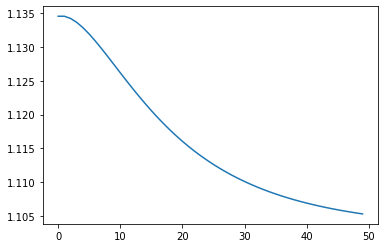

In [55]:
plt.plot(losses)

In [56]:
# Calculates accuracy of test data
def accuracy(y, y_pred):

    total_correct = 0
    confusion_matrix = np.zeros(shape=(CLASS_NUMBER, CLASS_NUMBER))

    numData = y.shape[1]
    
    # Iterating through all of data
    for data in range(numData):
        # Returns array for index of max probabilities for each data point 
        y_indexes = np.argmax(y, axis=0)
        y_pred_indexes = np.argmax(y_pred, axis=0)
        
        confusion_matrix[y_indexes[data]][y_pred_indexes[data]] += 1
        total_correct = np.sum(y_indexes == y_pred_indexes)
        
    total_accuracy = total_correct/numData
    return confusion_matrix, total_accuracy 


In [57]:
# Accuracy and confusion matrix check
z = class_corr(w, b, x_test)
y_pred = softmax(z)

confusion_matrix, model_acc = accuracy(y_test, y_pred)

print(confusion_matrix)
print(model_acc)


[[3. 1. 1.]
 [1. 2. 8.]
 [5. 3. 6.]]
0.36666666666666664
